In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
import numpy as np

def objective_function(x):
    assert type(x) is np.ndarray and len(x) == 2
    return (-x[0] + 2)**2 + 10 * (x[1] - x[0]**2)**2

def gradient(x):
    assert type(x) is np.ndarray and len(x) == 2
    return np.array([2 * (x[0] - 2) - 40 * x[0] * (x[1] - x[0]**2), 20 * (x[1] - x[0]**2)])

def find_minimizer(starting_point, tolerance, step_size):
    assert type(starting_point) is np.ndarray and len(starting_point) == 2
    assert tolerance >= 0
    assert step_size >= 0

    x = starting_point
    gradient_x = gradient(x)
    iteration = 0

    function_values = [objective_function(x)]
    #print('iter:', iteration, ' x:', x, ' f(x):', objective_function(x), ' grad at x:', gradient_x, ' gradient norm:', np.linalg.norm(gradient_x))

    while np.linalg.norm(gradient_x) > tolerance:
        x = np.subtract(x, np.multiply(step_size, gradient_x))
        iteration += 1
        gradient_x = gradient(x)

        function_values.append(objective_function(x))
        #print('iter:', iteration, ' x:', x, ' f(x):', objective_function(x), ' grad at x:', gradient_x, ' gradient norm:', np.linalg.norm(gradient_x))

    return x, function_values, iteration


Optimal value of x1 and x2 :  [1.81203106 3.27863423] 

Optimal value of x1 and x2 :  [1.97958254 3.91826209] 

Optimal value of x1 and x2 :  [1.99794048 3.99171763] 

Optimal value of x1 and x2 :  [1.99979387 3.99917066] 



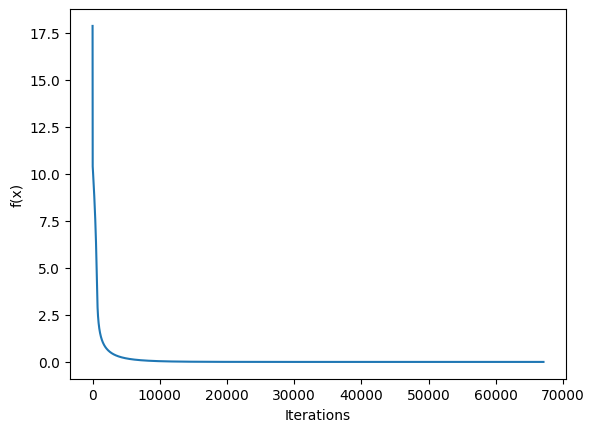

In [ ]:
import matplotlib.pyplot as plt

starting_point= np.array([-1.5,1.5])
step_length = 0.001
tolerance= [1e-1,1e-2,1e-3,1e-4]
final_objective=[]
Num_of_itr=[]
opt_value=[]
opt_fx =[]

for i in range(len(tolerance)):
  optimal_x, func_vals_ret,k = find_minimizer(starting_point, tolerance[i], step_length)
  print('Optimal value of x1 and x2 : ', optimal_x, '\n')
  final_objective.append(min(func_vals_ret))
  Num_of_itr.append(k)
  opt_value.append(optimal_x)
  opt_fx.append(objective_function(optimal_x))




plt.plot(func_vals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

In [ ]:
minimumvalue=min(final_objective)
minimiser=opt_value[final_objective.index(minimumvalue)]
print(f'the Minimum value of the function is : {minimumvalue} and minimiser of the function is : {minimiser}')

the Minimum value of the function is : 4.2725588638540594e-08 and minimiser of the function is : [1.99979387 3.99917066]


In [ ]:
import pandas as pd
data = {'Tolerance': tolerance, 'Minimiser': opt_fx, 'Iterations': Num_of_itr}
Tabular_form=pd.DataFrame(data)
Tabular_form

,Tolerance,Minimiser,Iterations
0,0.1000,3.556487e-02,10326
1,0.0100,4.192243e-04,27996
2,0.0010,4.265179e-06,47455
3,0.0001,4.272559e-08,67112


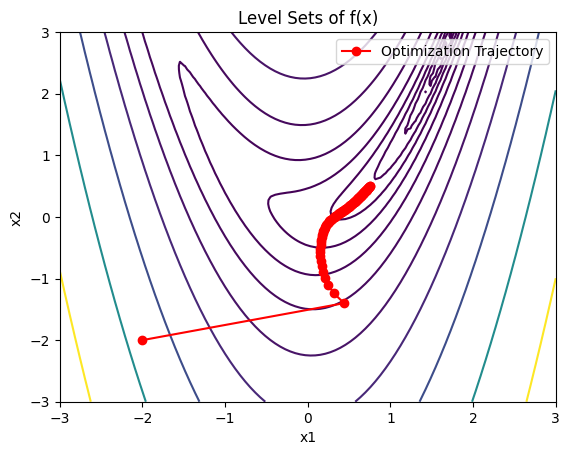

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x1, x2):
    return (1 + 1 - x1)**2 + 10 * (x2 - x1**2)**2

# Define the gradient of the function
def grad_f(x1, x2):
    df_dx1 = -2 * (1 + 1 - x1) - 40 * x1 * (x2 - x1**2)
    df_dx2 = 20 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])

# Define the optimization algorithm (e.g., gradient descent)
def gradient_descent(initial_point, learning_rate, num_iterations):
    trajectory = [initial_point]
    current_point = initial_point.copy()

    for _ in range(num_iterations):
        current_point = current_point - learning_rate * grad_f(*current_point)
        trajectory.append(current_point)

    return np.array(trajectory)

# Generate level sets
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

# Plot level sets
plt.contour(X1, X2, Z, levels=np.logspace(-3, 3, 20))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets of f(x)')

# Perform optimization and plot trajectory
initial_point = np.array([-2, -2])  # You can choose a different initial point
learning_rate = 0.005
num_iterations = 100

trajectory = gradient_descent(initial_point, learning_rate, num_iterations)
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Optimization Trajectory')
plt.legend()
plt.show()

#Part 4
Gradient descent with a constant step size (learning rate) has several shortcomings, and some of the key issues include:

Convergence Rate: Using a constant step size may result in slow convergence. A fixed learning rate might be too small, causing the algorithm to take many iterations to reach the minimum, or too large, causing overshooting and oscillations.

Sensitivity to Initial Learning Rate: The performance of the algorithm can be sensitive to the choice of the initial learning rate. A learning rate that works well for one problem may not be suitable for another.

